In [4]:
MAIN_PATH = "/home/carlos/MasterDS/tfm"
JSON_DATA_PATH = '{}/data/json/'.format(MAIN_PATH)
CSV_DATA_PATH = '{}/data/csv/'.format(MAIN_PATH)

In [5]:
import sys
sys.path.insert(0, MAIN_PATH)

In [6]:
%load_ext autoreload
%autoreload 2
from scripts.models.ltr_svm_tf.train import LTRSVMTFTrain
from scripts.models.ltr_svm_tf.metrics import LTRSVMTFMetrics

%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Entrenamiento

In [7]:
ltr_params = {
    'mode': 'tfidf',
    'count_vec_kwargs': {'strip_accents': 'unicode'},
    'target_metric': 'cosine_emb',
    'metric_params': {'embedding': 'distilroberta-base-paraphrase-v1',
                     'text_process': 'basic'},
    'drop_teams': True,
    'lemma': True,
    'train_perc': 0.7,
    'val_perc': 0.2
}

model_params = {}

In [8]:
ltr_train = LTRSVMTFTrain(model_params=model_params, ltr_params=ltr_params)

Setting target metric to cosine_emb
Setting mode to tfidf


In [9]:
ltr_train.path

'/home/carlos/MasterDS/tfm/models/ltr_svm_tfidf/2fcdfe0b57'

In [10]:
%%time
ltr_train.train()

Writing config in /home/carlos/MasterDS/tfm/models/ltr_svm_tfidf/2fcdfe0b57/config.pickle
Loading training data from /home/carlos/MasterDS/tfm/data/ltr/features_targets/c04dabab1a
Training model...
Writing model to /home/carlos/MasterDS/tfm/models/ltr_svm_tfidf/2fcdfe0b57/ckpt.pickle
Writing model info to /home/carlos/MasterDS/tfm/models/ltr_svm_tfidf/2fcdfe0b57/model_info.pickle
CPU times: user 4h 52min 52s, sys: 437 ms, total: 4h 52min 52s
Wall time: 4h 52min 54s


## Salida

In [11]:
model = ltr_train.read_model()

In [12]:
model

Pipeline(steps=[('model', SVR())])

In [13]:
model_info = ltr_train.read_model_info()

In [14]:
model_info

{'best_score': None, 'best_params': None, 'model_out': None}

## Métricas

In [15]:
ltr_metrics = LTRSVMTFMetrics(ltr_train)

In [16]:
ltr_metrics.run()

Computing metric for train dataset
Writing metrics to /home/carlos/MasterDS/tfm/models/ltr_svm_tfidf/2fcdfe0b57/train_metrics.pickle
Computing metric for validation dataset
Writing metrics to /home/carlos/MasterDS/tfm/models/ltr_svm_tfidf/2fcdfe0b57/validation_metrics.pickle
Computing metric for test dataset
Writing metrics to /home/carlos/MasterDS/tfm/models/ltr_svm_tfidf/2fcdfe0b57/test_metrics.pickle


Reading metrics from /home/carlos/MasterDS/tfm/models/ltr_svm_tfidf/2fcdfe0b57/train_metrics.pickle
mse : 0.004938323618447846
mae : 0.05724579949259144
r2 : 0.5399252953042193


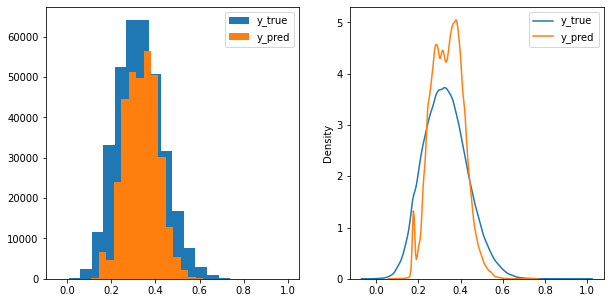

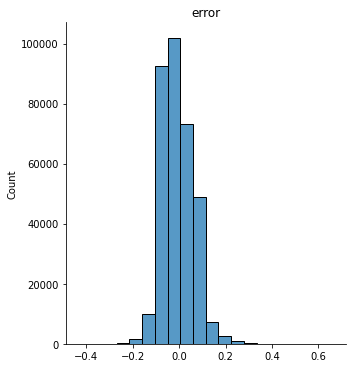

In [17]:
ltr_metrics.show_metrics('train')

Reading metrics from /home/carlos/MasterDS/tfm/models/ltr_svm_tfidf/2fcdfe0b57/validation_metrics.pickle
mse : 0.005833260541495809
mae : 0.06045502662413808
r2 : 0.45480988015501866


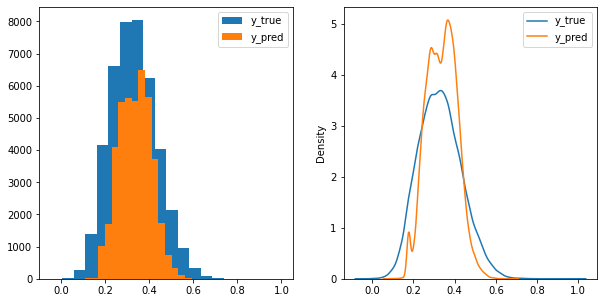

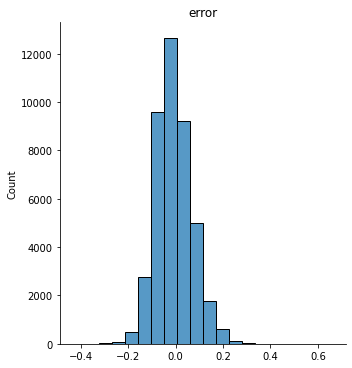

In [18]:
ltr_metrics.show_metrics('validation')